In [1]:
import seaborn as sns
import upsetplot
import pandas as pd
import numpy
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


In [3]:
df = pd.read_csv('../data/250903_signaturesizes.k31.tsv', sep='\t')

df.head()

,species,ownMAGs,GTDBgenomes,unique_own,shared,total,shared_p,GTDBgenomes_p,unique_own_p
0,Fimisoma_sp002320005,5848,4925,2888,2960,10773,27.476098,45.716142,26.807760
1,Mogibacterium_A_kristiansenii,11457,10715,8201,3256,22172,14.685189,48.326718,36.988093
2,Holdemanella_porci,8776,8412,5229,3547,17188,20.636491,48.941122,30.422388
3,UBA2868_sp004552595,22701,7344,18064,4637,30045,15.433516,24.443335,60.123149
4,Cryptobacteroides_sp900546925,12724,14714,7966,4758,27438,17.340914,53.626358,29.032728


In [4]:
df_melted = df.melt(id_vars="species", 
                           value_vars=[],
                           var_name="source", value_name="percent kmers")

In [5]:
df = df.sort_values("unique_own_p", ascending=False)

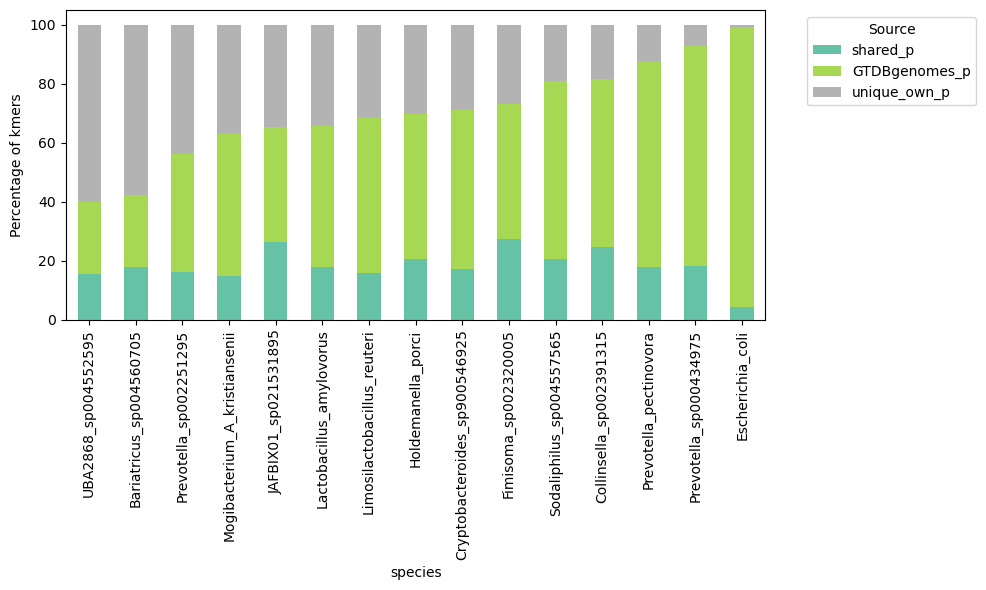

In [6]:
import matplotlib.pyplot as plt

# set index to name column
df_stacked = df[["shared_p", "GTDBgenomes_p", "unique_own_p"]].set_index(df["species"])

# make stacked bar plot
df_stacked.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="Set2"   # you can pick another colormap
)

plt.ylabel("Percentage of kmers")
plt.xticks(rotation=90)
plt.legend(title="Source", bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside
plt.tight_layout()
#plt.savefig('../plots/250903_percentage_kmers_pangenome.15spp.png')


In [7]:
df

,species,ownMAGs,GTDBgenomes,unique_own,shared,total,shared_p,GTDBgenomes_p,unique_own_p
3,UBA2868_sp004552595,22701,7344,18064,4637,30045,15.433516,24.443335,60.123149
6,Bariatricus_sp004560705,21899,6981,16710,5189,28880,17.967452,24.172438,57.860111
10,Prevotella_sp002251295,22939,15094,16729,6210,38033,16.327926,39.686588,43.985486
1,Mogibacterium_A_kristiansenii,11457,10715,8201,3256,22172,14.685189,48.326718,36.988093
7,JAFBIX01_sp021531895,12240,7857,6940,5300,20097,26.372095,39.095387,34.532517
11,Lactobacillus_amylovorus,18695,17192,12259,6436,35887,17.934071,47.905927,34.160002
8,Limosilactobacillus_reuteri,17005,18656,11328,5677,35661,15.919352,52.314854,31.765795
2,Holdemanella_porci,8776,8412,5229,3547,17188,20.636491,48.941122,30.422388
4,Cryptobacteroides_sp900546925,12724,14714,7966,4758,27438,17.340914,53.626358,29.032728
0,Fimisoma_sp002320005,5848,4925,2888,2960,10773,27.476098,45.716142,26.807760


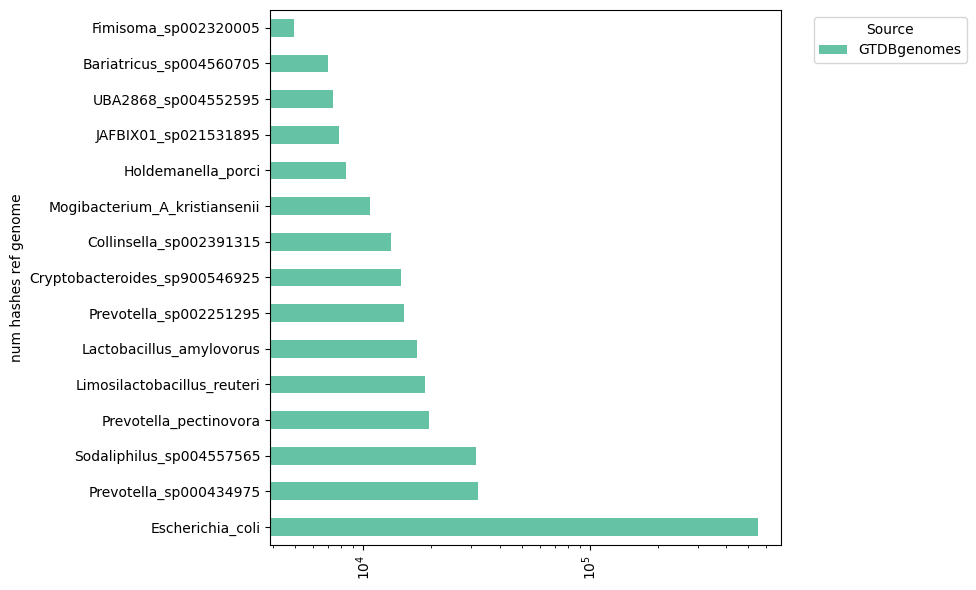

In [8]:
df = df.sort_values("GTDBgenomes", ascending=False)

# set index to name column
df_stacked = df[["GTDBgenomes"]].set_index(df["species"])

# make stacked bar plot
df_stacked.plot(
    kind="barh",
    stacked=True,
    figsize=(10, 6),
    colormap="Set2"   # you can pick another colormap
)
plt.xscale("log")
plt.ylabel("num hashes ref genome")
plt.xticks(rotation=90)
plt.legend(title="Source", bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside
plt.tight_layout()
#plt.savefig('../plots/250904_hashrefgnome.15spp.png')
